Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4388 - val_loss: 0.3141
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3064 - val_loss: 0.3004
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2969 - val_loss: 0.2954
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2917 - val_loss: 0.2917
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2882 - val_loss: 0.2885
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2851 - val_loss: 0.2863
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2838 - val_loss: 0.2846
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2823 - val_loss: 0.2841
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2811 - val_loss: 0.2821
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2795 - val_loss: 0.2812
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


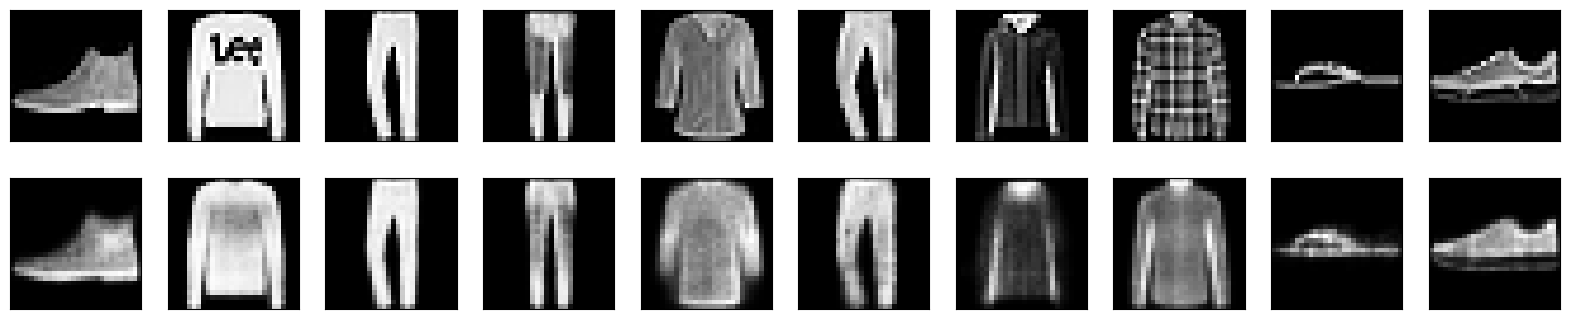

In [4]:
import numpy as np
import keras
from keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset (60,000 training and 10,000 test images)
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the images to the range [0, 1] by dividing by 255 (original range is 0-255)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images to 1D arrays (28x28 = 784 pixels per image)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Define the encoding dimension (latent space size)
encoding_dim = 32  # The number of features in the compressed representation

# Build the encoder part
input_img = keras.Input(shape=(784,))  # Input layer with 784 features (28x28 pixels flattened)
encoded = layers.Dense(256, activation="relu")(input_img)  # First dense layer with ReLU activation
encoded = layers.Dense(128, activation="relu")(encoded)    # Second dense layer with ReLU
encoded = layers.Dense(encoding_dim, activation="relu")(encoded)  # Bottleneck (compressed representation)

# Build the decoder part
decoded = layers.Dense(128, activation="relu")(encoded)  # First dense layer after bottleneck
decoded = layers.Dense(256, activation="relu")(decoded)  # Second dense layer
decoded = layers.Dense(784, activation="sigmoid")(decoded)  # Output layer with sigmoid activation (scaled to [0,1])

# Define the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Define the encoder model (to compress inputs into latent space)
encoder = keras.Model(input_img, encoded)

# Define the decoder model (to reconstruct from latent space)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_output = autoencoder.layers[-1](decoder_layer2)
decoder = keras.Model(encoded_input, decoder_output)

# Compile the autoencoder with an optimizer and loss function
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder on the training data
autoencoder.fit(
    x_train, x_train,  # Training the model to recreate the input images
    epochs=10,         # Number of epochs to train
    batch_size=256,    # Size of each training batch
    shuffle=True,      # Shuffle the data before each epoch
    validation_data=(x_test, x_test),  # Validate on the test data
)

# Encode and decode the test images
encoded_imgs = encoder.predict(x_test)   # Encode the test images into latent space
decoded_imgs = decoder.predict(encoded_imgs)  # Decode the latent space back into reconstructed images

# Visualize the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # Reshape back to 28x28 image
    plt.gray()  # Display in grayscale
    ax.get_xaxis().set_visible(False)  # Hide the axes
    ax.get_yaxis().set_visible(False)

    # Display the reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # Reshape back to 28x28 image
    plt.gray()  # Display in grayscale
    ax.get_xaxis().set_visible(False)  # Hide the axes
    ax.get_yaxis().set_visible(False)
plt.show()
